

### TMNIST (Typography MNIST) Glyphs: A database of over 500,000 MNIST style images made from 1,812 unique glyphs and 2,990 font-styles

In [ ]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras

from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelBinarizer
import os
os.environ['CUDA_VISIBLE_DEVICES'] = "0"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Loading the Dataset

In [ ]:
data = pd.read_csv('Glyphs_TMNIST_updated.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100981 entries, 0 to 100980
Columns: 787 entries, font_name to 784
dtypes: float64(582), int64(202), object(3)
memory usage: 606.3+ MB


## Shape of the Dataframe

In [ ]:
print(f"Shape of the Dataframe: {data.shape}")

Shape of the Dataframe: (100981, 787)


We will create the train and test set for the fonts

In [ ]:
# Alphanumeric and Symbols List

symbolsArr = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 
           'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 
           '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 
           '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@','[',']','\\','^','_','`','{','}',"|",'~']

len(symbolsArr)

94

## Get all the symbols present in the array from the dataset

In [ ]:
data = data[data.label.isin(symbolsArr)]

### DataFrame Description

In [ ]:

data.describe().T

,count,mean,std,min,25%,50%,75%,max
1,58105.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,58105.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,58105.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,58105.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,58105.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
780,58104.0,0.000447,0.084001,0.0,0.0,0.0,0.0,19.0
781,58104.0,0.000327,0.078823,0.0,0.0,0.0,0.0,19.0
782,58104.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
783,58104.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [ ]:
# DataFrame feature's Datatype

data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58105 entries, 0 to 100980
Data columns (total 787 columns):
 #    Column      Dtype  
---   ------      -----  
 0    font_name   object 
 1    glyph_name  object 
 2    label       object 
 3    1           int64  
 4    2           int64  
 5    3           int64  
 6    4           int64  
 7    5           int64  
 8    6           int64  
 9    7           int64  
 10   8           int64  
 11   9           int64  
 12   10          int64  
 13   11          int64  
 14   12          int64  
 15   13          int64  
 16   14          int64  
 17   15          int64  
 18   16          int64  
 19   17          int64  
 20   18          int64  
 21   19          int64  
 22   20          int64  
 23   21          int64  
 24   22          int64  
 25   23          int64  
 26   24          int64  
 27   25          int64  
 28   26          int64  
 29   27          int64  
 30   28          int64  
 31   29          int64  
 32  

## Number of unique fonts in the dataset

In [ ]:
print(f"Unique fonts present in the Dataset: {len(data.font_name.unique())}")

Unique fonts present in the Dataset: 680


## Unique character in the Dataframe


In [ ]:
print(f"Unique character present in the Dataset: {len(data.label.unique())}")

Unique character present in the Dataset: 87


In [ ]:
# Spliting the Labels and the features
X = data.drop(columns=['font_name','glyph_name','label']).values
y = data[['label']].values
del data

In [ ]:
X = X.astype('u1')
X.dtype

dtype('uint8')

In [ ]:
# We will check the shape of x and y
X.shape, y.shape

NameError: ignored

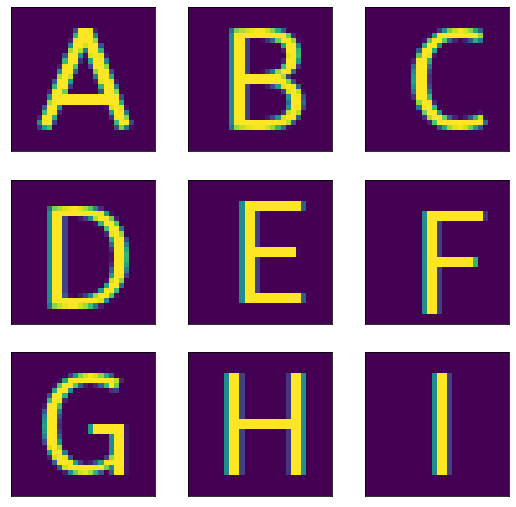

In [ ]:
# Display few of the characters

import matplotlib.pyplot as plt

X_images = X.reshape(-1,28,28)
fig,axs = plt.subplots(3,3,figsize=(9,9))
for i in range(9):
    r=i//3
    c=i%3
    axs[r][c].set_xticks([])
    axs[r][c].set_yticks([])
    axs[r][c].imshow(X_images[i])
plt.show()
del X_images

Split the Dataframe into Training and Test Dataframe¶

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
y_train = y_train.reshape((-1,))
y_test = y_test.reshape((-1,))

In [ ]:
X_train.shape, X_test.shape

((52294, 784), (5811, 784))

In [ ]:
y_train.shape, y_test.shape

((52294,), (5811,))

# Binarize labels¶


In [ ]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
y_train_label = lb.fit_transform(y_train)
y_test_label = lb.transform(y_test)
print('Train labels dimension:');print(y_train.shape)
print('Test labels dimension:');print(y_test.shape)

Train labels dimension:
(52294,)
Test labels dimension:
(5811,)


# Normalize the Training and Testing Dataset¶


In [ ]:
# Normalizing the Dataset for the Neural Network

X_train, X_test = np.true_divide(X_train, 255), np.true_divide(X_test, 255)

# Dense Neural Network



# we will use the dense neural network to run the model and test the accuracy of the training datasets

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import roc_auc_score, accuracy_score

In [ ]:
# Create Model
model = Sequential()
model.add(Dense(250, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(125, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(y_train_label.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

We will run a sequesntial model with first 250 neurons as activation= relu, and then next 125 neurons as relu and then again we will add another 
layer of 100 neurons with activation as relu

In [ ]:
# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 250)               196250    
                                                                 
 dense_1 (Dense)             (None, 125)               31375     
                                                                 
 dense_2 (Dense)             (None, 100)               12600     
                                                                 
 dense_3 (Dense)             (None, 87)                8787      
                                                                 
Total params: 249,012
Trainable params: 249,012
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Configure the model and start training
model.fit(X_train, y_train_label, epochs=2, batch_size=150, verbose=1, validation_split=0.1)

Epoch 1/2
314/314 [==============================] - 3s 8ms/step - loss: 1.4242 - accuracy: 0.6505 - val_loss: 0.8050 - val_accuracy: 0.7805
Epoch 2/2
314/314 [==============================] - 2s 7ms/step - loss: 0.6558 - accuracy: 0.8169 - val_loss: 0.5904 - val_accuracy: 0.8314


After fitting the the model we can see that the accuracy is only 83% without training the dataset. Let's check the accuracy after training the datasets.

In [ ]:
# Test the model after training
test_results = model.evaluate(X_test, y_test_label, verbose=1)
print(f'Test results - Accuracy: {test_results[1]}%')

182/182 [==============================] - 0s 2ms/step - loss: 0.6076 - accuracy: 0.8288
Test results - Accuracy: 0.828773021697998%


# Convolution Neural Network


In [ ]:
# Reshape X_train and X_test for CNN

X_train = X_train.reshape(-1,28,28,1).astype('float32')
X_test = X_test.reshape(-1,28,28,1).astype('float32')

In [ ]:
X_train.shape

(52294, 28, 28, 1)

In [ ]:
#CNN Model

cnnmodel = Sequential()
cnnmodel.add(Conv2D(32,(4,4),input_shape = (28,28,1),activation = 'relu'))
cnnmodel.add(MaxPooling2D(pool_size=(2,2)))
cnnmodel.add(Conv2D(64,(3,3),activation = 'relu'))
cnnmodel.add(MaxPooling2D(pool_size=(2,2)))
cnnmodel.add(Dropout(0.2))
cnnmodel.add(Flatten())
cnnmodel.add(Dense(128,activation='relu'))
cnnmodel.add(Dense(y_train_label.shape[1], activation='softmax'))
cnnmodel.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

we have used a cnn model to tain the data and shape the data using activation softmax. Afterwards we have compiled the model using categorical_crossentropy and optimizer as adam.

In [ ]:
# CNN Model Summary

cnnmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)             

In [ ]:
# Train the CNN Model
result = cnnmodel.fit(X_train, y_train_label, validation_split=0.1, epochs=20, batch_size=100, verbose=1)

Epoch 1/20
471/471 [==============================] - 36s 75ms/step - loss: 1.1738 - accuracy: 0.7007 - val_loss: 0.5335 - val_accuracy: 0.8426
Epoch 2/20
471/471 [==============================] - 33s 70ms/step - loss: 0.4977 - accuracy: 0.8477 - val_loss: 0.4366 - val_accuracy: 0.8621
Epoch 3/20
471/471 [==============================] - 34s 73ms/step - loss: 0.3946 - accuracy: 0.8733 - val_loss: 0.3634 - val_accuracy: 0.8876
Epoch 4/20
471/471 [==============================] - 33s 70ms/step - loss: 0.3297 - accuracy: 0.8884 - val_loss: 0.3139 - val_accuracy: 0.9017
Epoch 5/20
234/471 [=============>................] - ETA: 16s - loss: 0.2879 - accuracy: 0.9006

In [ ]:
# Test the CNN model after training
test_results = cnnmodel.evaluate(X_test, y_test_label, verbose=1)
print(f'Test results - Accuracy: {test_results[1]}%')

After training anf running the cnn model we get an accuracy of 94.97%

Conclusion:

We have an accuracy of 94.9% when we run on 20 epochs. It is clear that after using CNN model and training the datasets the accuracy increased drastically.


Licensing Copyright 2022 Pratik Gawand

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.